In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Data Cleaning & Preprocessing

In [2]:
df = pd.read_csv("dataset/calories.csv")

# Explore Data

### Display first 5 rows

In [3]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


### Display dataset info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


### Summary statistics

In [5]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


### Check for missing values

In [6]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

### Check for duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

### Check for outliers

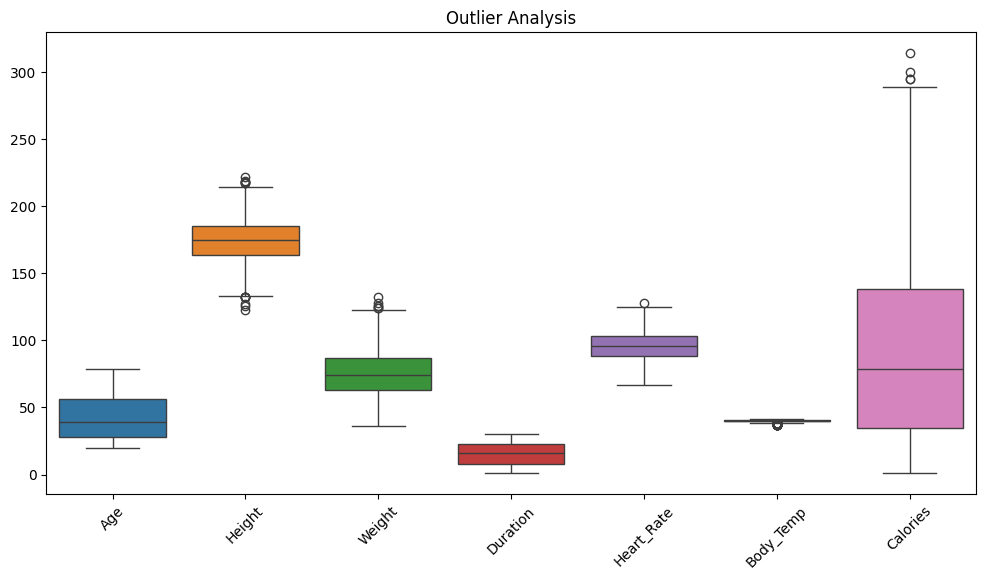

In [8]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']])
plt.xticks(rotation=45)
plt.title('Outlier Analysis')
plt.show()

# Feature Engineering

### Features calculation

In [9]:
# BMI Calculation
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2

# Calories per Minute
df['Calories per Minute'] = df['Calories'] / df['Duration']

# Calories per kg
df['Calories per kg'] = df['Calories'] / df['Weight']

# Heart Rate per Minute
df['Heart Rate per Minute'] = df['Heart_Rate'] / df['Duration']

# Intensity Score
df['Intensity Score'] = df['Heart_Rate'] * df['Duration'] / df['Weight']

# Temperature Deviation
df['Temperature Deviation'] = df['Body_Temp'] - 36.6

df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,Calories per Minute,Calories per kg,Heart Rate per Minute,Intensity Score,Temperature Deviation
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,26.038781,7.965517,2.457447,3.620690,32.393617,4.2
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,21.773842,4.714286,1.100000,6.714286,21.933333,3.7
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,24.655910,5.200000,0.329114,17.600000,5.569620,2.1
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,22.159109,5.461538,1.000000,7.692308,18.309859,3.9
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,24.456063,3.500000,0.603448,8.100000,13.965517,3.2


### Categorize Age and check distribution

In [10]:
def categorize_age(age):
    if age < 25:
        return "young"
    elif 25 <= age < 50:
        return "middle aged"
    else:
        return "senior"

df['Age Category'] = df['Age'].apply(categorize_age)

df['Age Category'].value_counts()

Age Category
middle aged    7561
senior         5104
young          2335
Name: count, dtype: int64

### Categorize BMI and check distribution

In [11]:
def categorize_bmi(bmi):
    if bmi < 16:
        return "Severe underweight"
    elif 16 <= bmi < 17:
        return "Moderate underweight"
    elif 17 <= bmi < 18.5:
        return "Mild underweight"
    elif 18.5 <= bmi < 25:
        return "Normal weight"
    elif 25 <= bmi < 30:
        return "Overweight"
    elif 30 <= bmi < 35:
        return "Obesity Class I"
    elif 35 <= bmi < 40:
        return "Obesity Class II"
    else:
        return "Obesity Class III"

df['BMI Category'] = df['BMI'].apply(categorize_bmi)

df['BMI Category'].value_counts()

BMI Category
Normal weight    9792
Overweight       5208
Name: count, dtype: int64

# Exploratory Data Analysis (EDA)

### Check Calories distribution

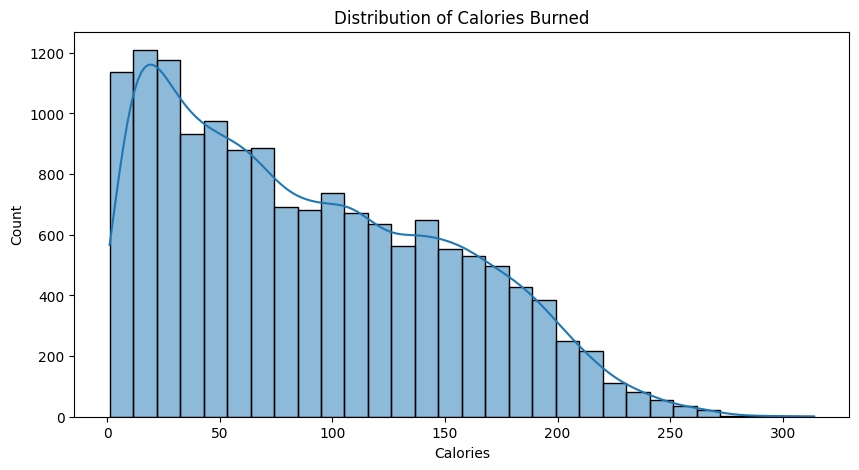

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(df['Calories'], bins=30, kde=True)
plt.title("Distribution of Calories Burned")
plt.show()

### Correlation Heatmap

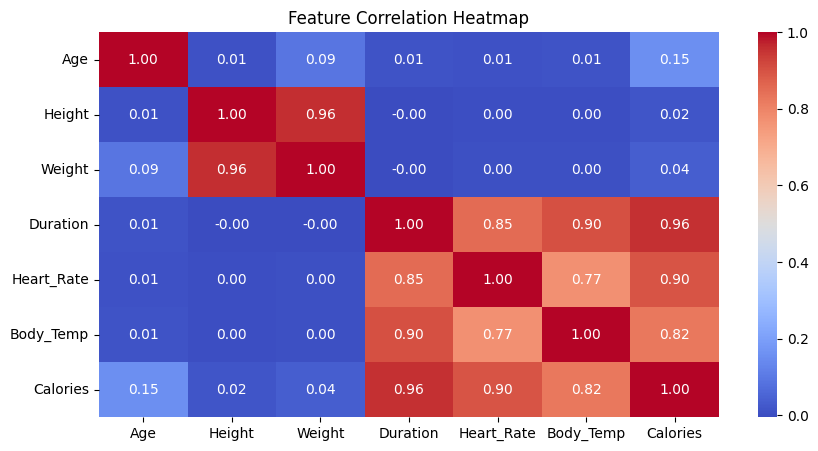

In [13]:
numeric_df=df[['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']]
plt.figure(figsize=(10,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### Pairplot for Multivariate Analysis

In [14]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories', 'BMI', 'Calories per Minute',
       'Calories per kg', 'Heart Rate per Minute', 'Intensity Score',
       'Temperature Deviation', 'Age Category', 'BMI Category'],
      dtype='object')

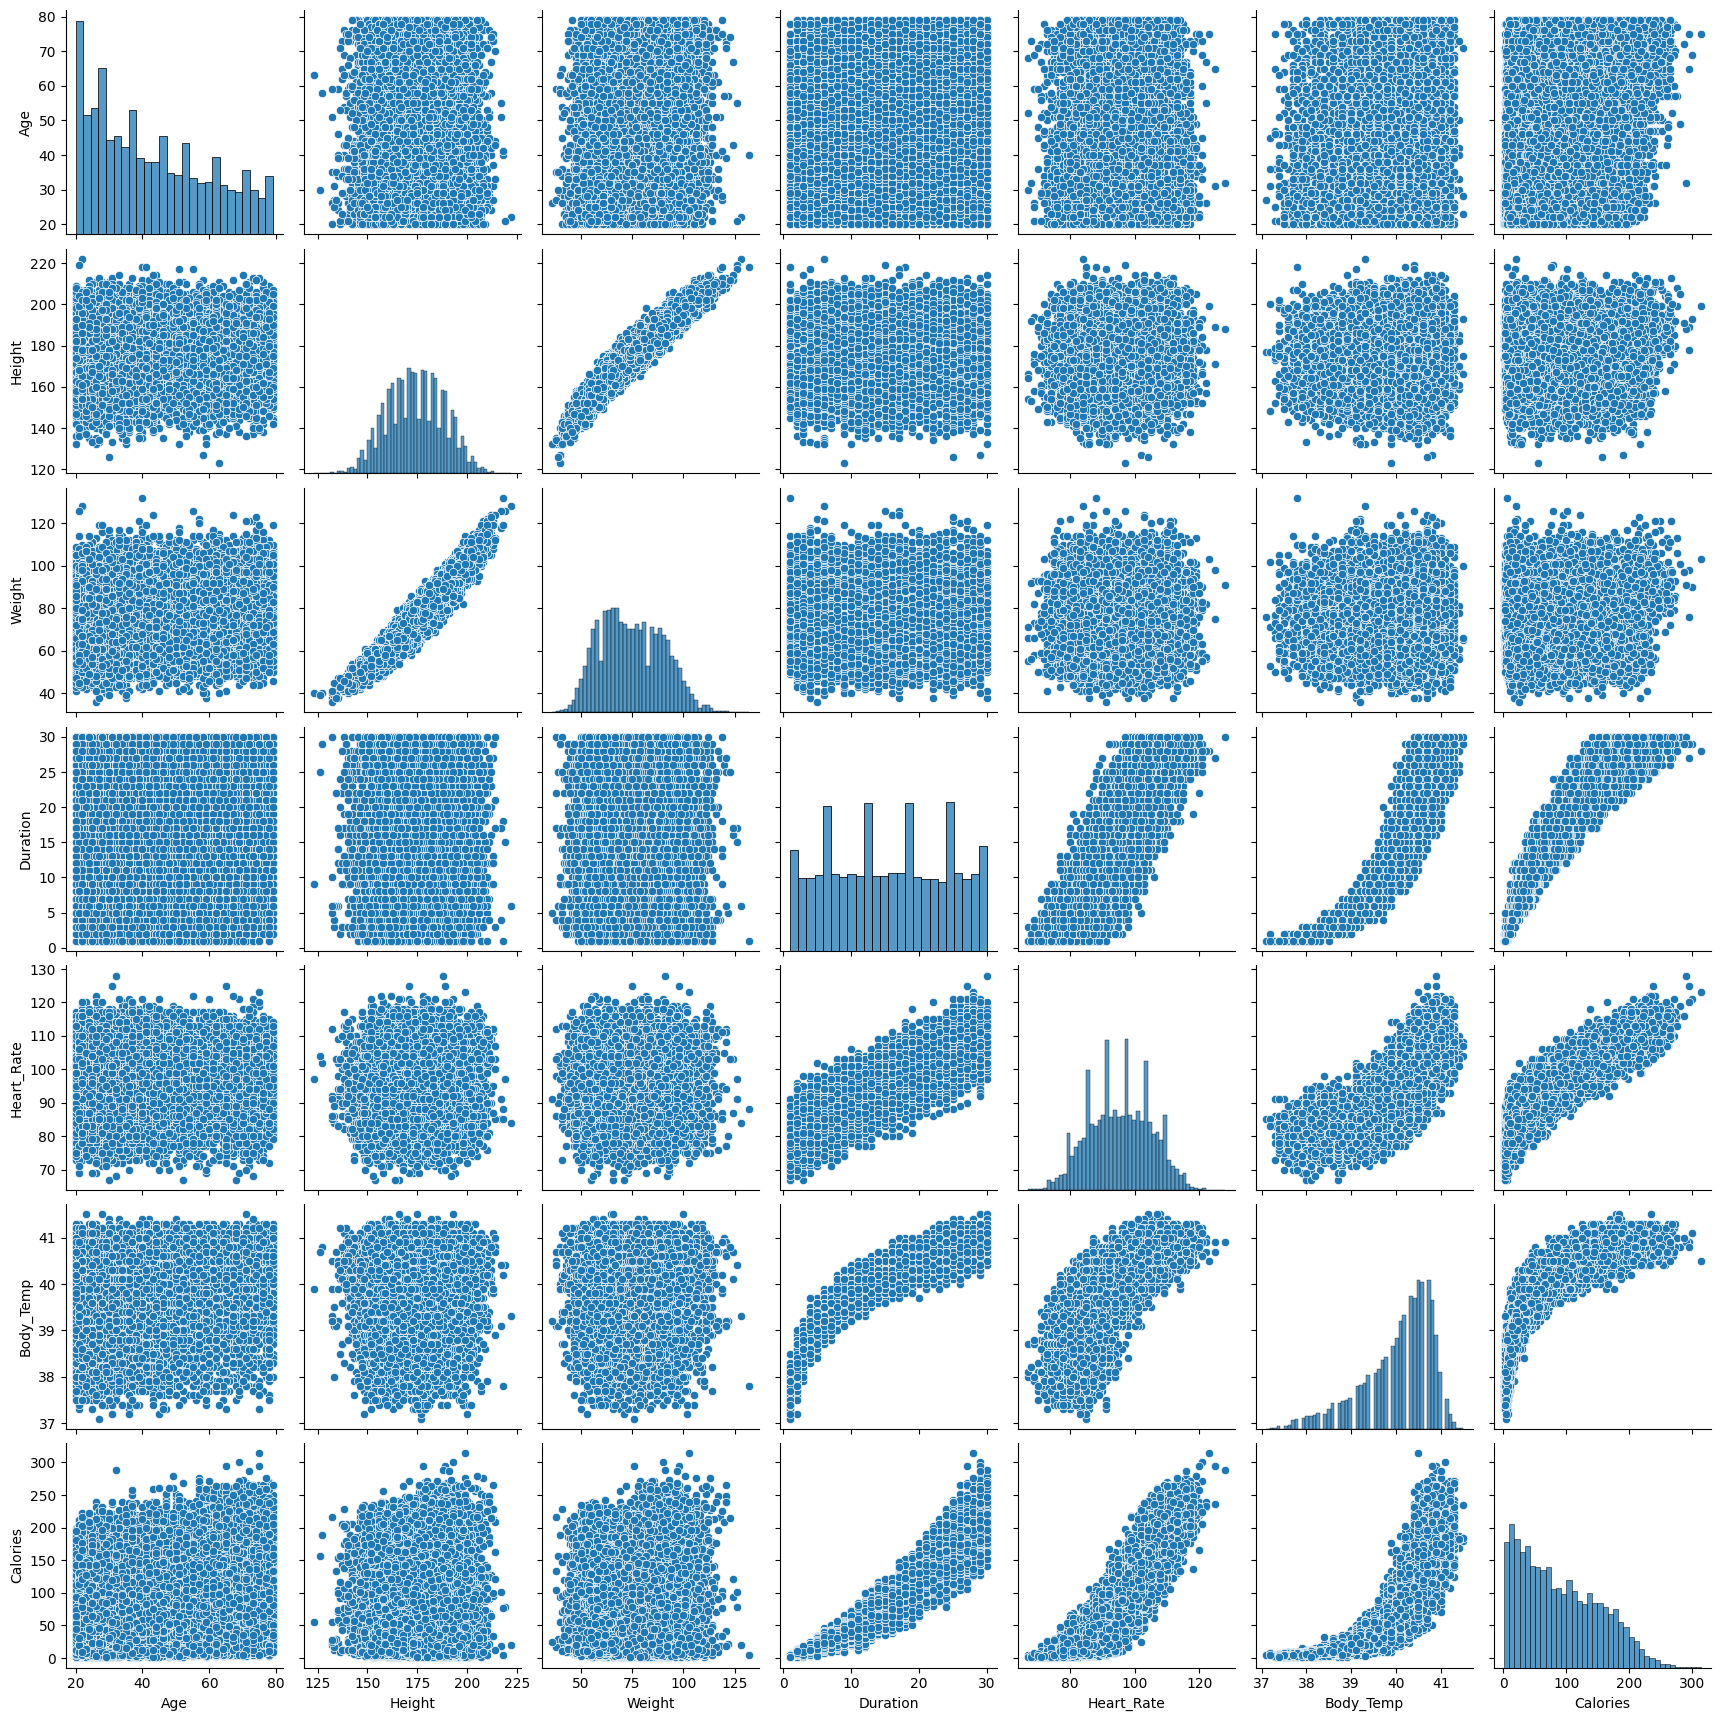

In [15]:
sns.pairplot(df[['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']])
plt.show()

### Checking BMI impact on Calories Burned

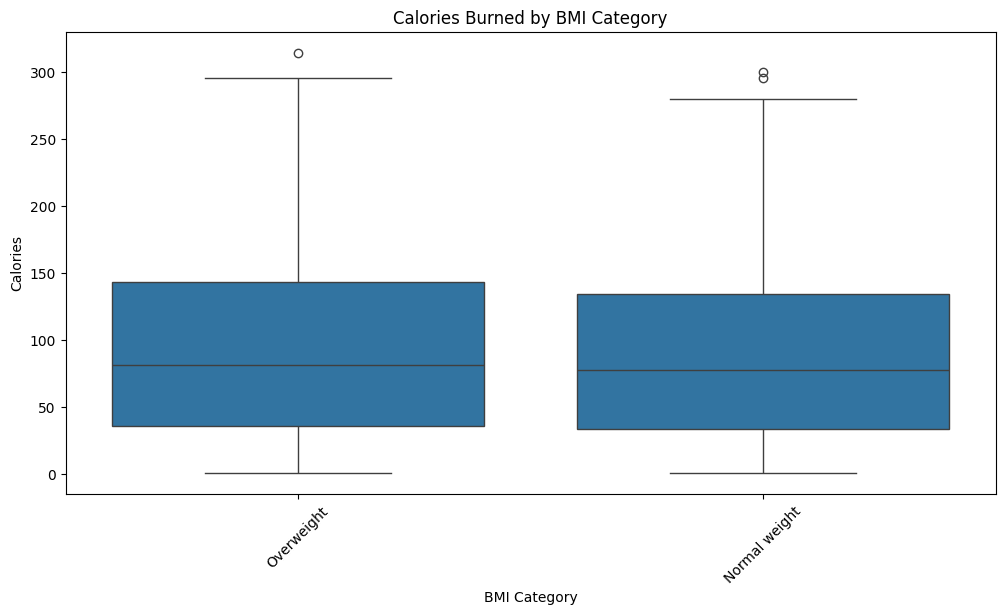

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['BMI Category'], y=df['Calories'])
plt.xticks(rotation=45)
plt.title("Calories Burned by BMI Category")
plt.show()

### Check relationship between Duration and Calories Burned

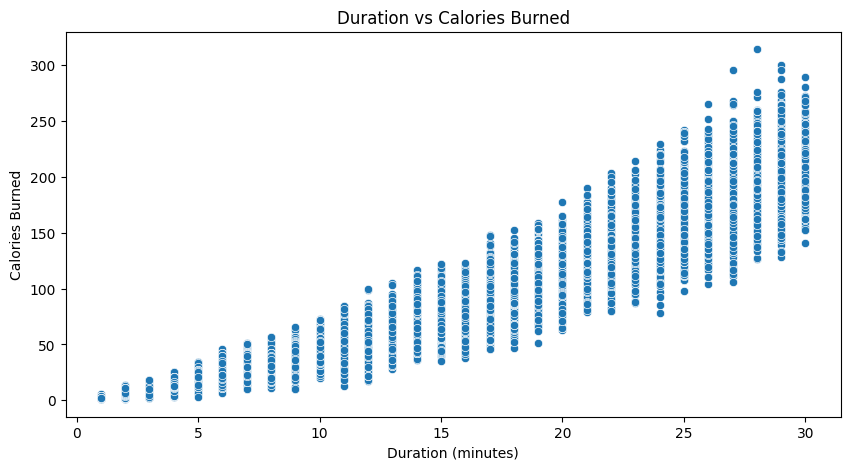

In [17]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Duration'], y=df['Calories'])
plt.title("Duration vs Calories Burned")
plt.xlabel("Duration (minutes)")
plt.ylabel("Calories Burned")
plt.show()

### Average number of calories burned in different Age Categories

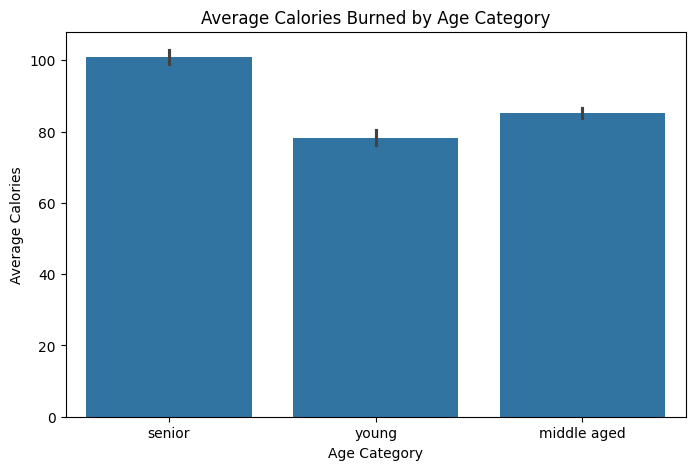

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['Age Category'], y=df['Calories'], estimator=np.mean)
plt.title("Average Calories Burned by Age Category")
plt.ylabel("Average Calories")
plt.show()

### Check relationship between Heart Rate and Calories Burned

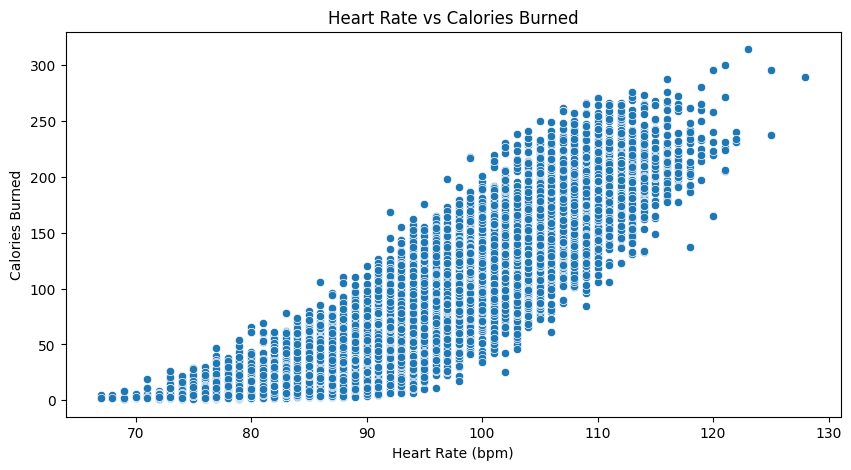

In [19]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Heart_Rate'], y=df['Calories'])
plt.title("Heart Rate vs Calories Burned")
plt.xlabel("Heart Rate (bpm)")
plt.ylabel("Calories Burned")
plt.show()

### Check relationship between Intensity Score and Calories

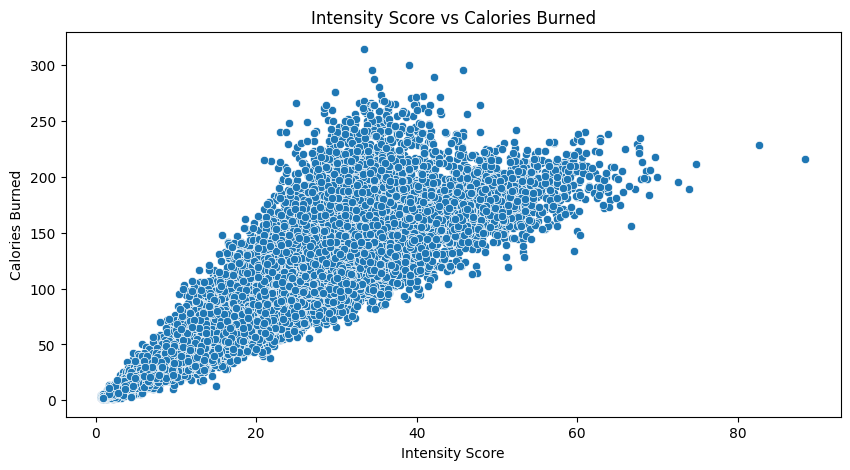

In [20]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Intensity Score'], y=df['Calories'])
plt.title("Intensity Score vs Calories Burned")
plt.xlabel("Intensity Score")
plt.ylabel("Calories Burned")
plt.show()

### Check distribution of Intensity Score

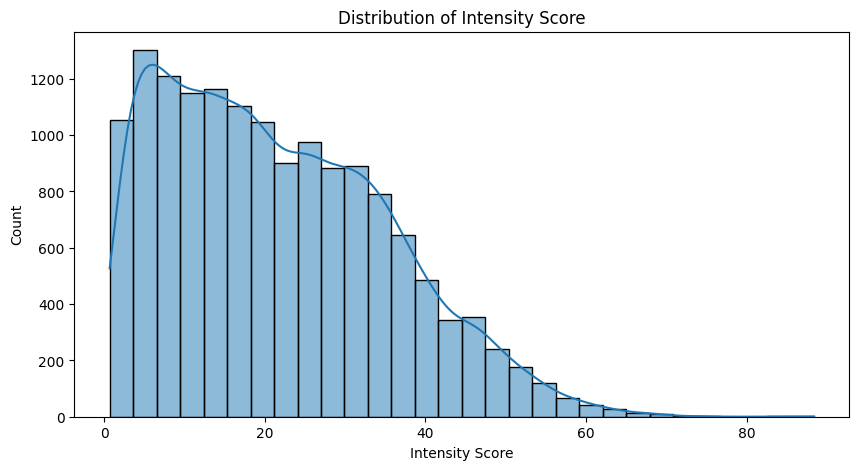

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(df['Intensity Score'], bins=30, kde=True)
plt.title("Distribution of Intensity Score")
plt.show()

### Check distribution of Temperature Deviation

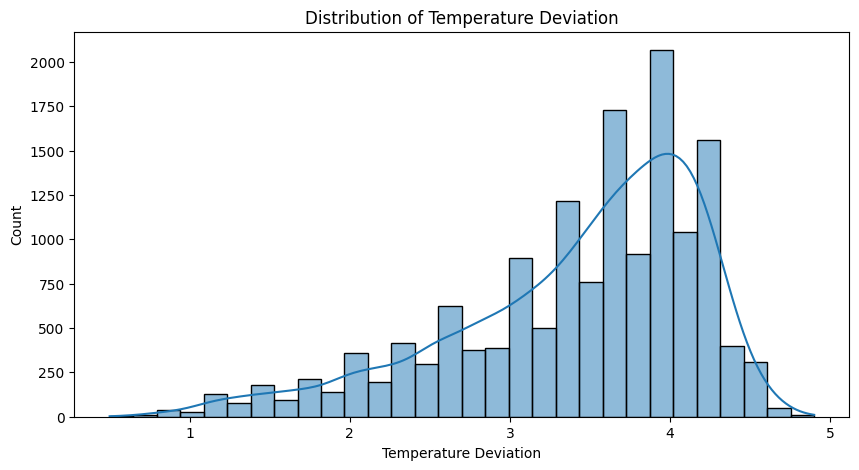

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(df['Temperature Deviation'], bins=30, kde=True)
plt.title('Distribution of Temperature Deviation')
plt.show()

# Machine Learning Approach for Calories Burnt Prediction

## Why Use Machine Learning?

In this project, I aim to predict the number of calories burned during a workout based on multiple features such as training duration, heart rate, weight, BMI, and more. I have chosen a Machine Learning approach for several key reasons:

- **Handling Complex, Multivariate Data:**  
  Our dataset contains 15,000 records with various measurements. ML techniques enable us to model complex, non-linear relationships that might not be captured by traditional statistical methods.

- **Capturing Non-Linear Relationships:**  
  Factors influencing calorie burn (e.g., workout duration, heart rate, body metrics) interact in non-linear ways. Models such as Random Forest and XGBoost can effectively capture these interactions and provide deeper insights.

- **Feature Importance & Personalization:**  
  By training ML models, we can quantitatively assess the importance of each feature. This helps us understand which factors (e.g., duration, heart rate, BMI) have the most significant impact on calorie burn and enables personalized training recommendations.

- **What-If Analysis:**  
  A predictive model allows us to simulate various scenarios (e.g., changes in workout duration or intensity) and observe how these adjustments affect calorie expenditure, aiding in the optimization of training programs.


## What is teh Plan to Do

1. **Data Preparation:**  
   We will clean and preprocess our dataset, perform feature engineering (e.g., calculating BMI, Calories per Minute, etc.), and prepare the data for modeling.

2. **Modeling:**  
   - **Baseline Model:** We'll start with a simple Linear Regression model as a baseline.
   - **Advanced Models:** We'll then experiment with more advanced models such as Random Forest and XGBoost to capture non-linear relationships and interactions among features.

3. **Evaluation:**  
   The models will be evaluated using metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and the R² score to determine their performance.

4. **Insight Extraction:**  
   We will analyze feature importance and use Partial Dependence Plots (PDP) to understand the non-linear effects of features like training duration on calorie burn. These insights will help in personalizing training recommendations.

## Potential Applications

- **Personalized Training Recommendations:**  
  Tailor workout programs based on individual characteristics (e.g., age, BMI, heart rate) to maximize calorie burn.

- **Performance Monitoring:**  
  Monitor and adjust training plans by predicting outcomes under different scenarios, helping users optimize their workout routines.

- **Optimization of Exercise Routines:**  
  Use model insights to identify the most effective training durations and intensities for different user segments, enabling data-driven improvements in fitness programs.

# Import Machine Learning Libraries

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select Features, Target and Data Division

In [24]:
features = ['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 
            'BMI', 'Calories per Minute', 'Calories per kg', 'Intensity Score', 
            'Temperature Deviation', 'Age Category', 'BMI Category']

target = 'Calories'

# Data Division
X = df[features]
y = df[target]

# Prepare Data: encoding and scaling

### Divide Features into numerical and categorical

In [25]:
categorical_features = ['Gender', 'Age Category', 'BMI Category']
numerical_features = list(set(features) - set(categorical_features))

### Transform Data: Scaling Numeric Features and Encoding Categorical Features

In [26]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

### Split Data into training and test sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Transform Data and check dimensions

In [28]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

X_train.shape, X_test.shape

((12000, 15), (3000, 15))

# Model Training and Evaluation

### Create and train a model (Linear Regression)

In [29]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

### Prediction on the test set

In [30]:
y_pred_lr = model_lr.predict(X_test)

### Model Evaluation

In [31]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Metrics:")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²: {r2_lr:.2f}")

Linear Regression Metrics:
MAE: 2.71
RMSE: 3.64
R²: 1.00


### Visualization of actual vs. predicted values

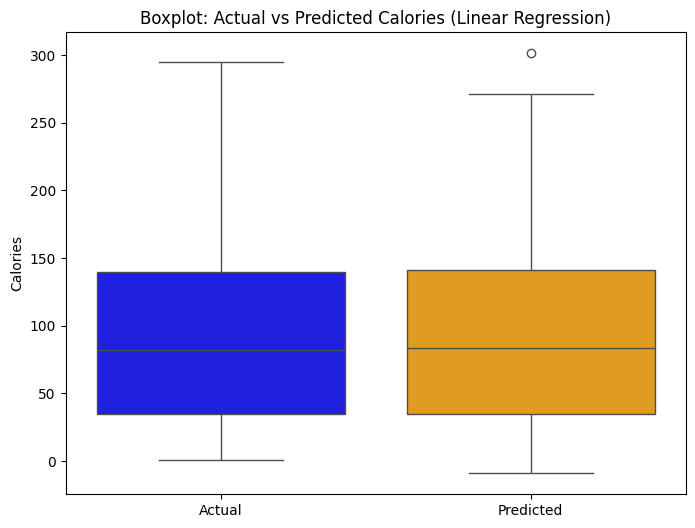

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=[y_test, y_pred_lr], palette=["blue", "orange"])
plt.xticks([0, 1], ["Actual", "Predicted"])
plt.ylabel("Calories")
plt.title("Boxplot: Actual vs Predicted Calories (Linear Regression)")
plt.show()

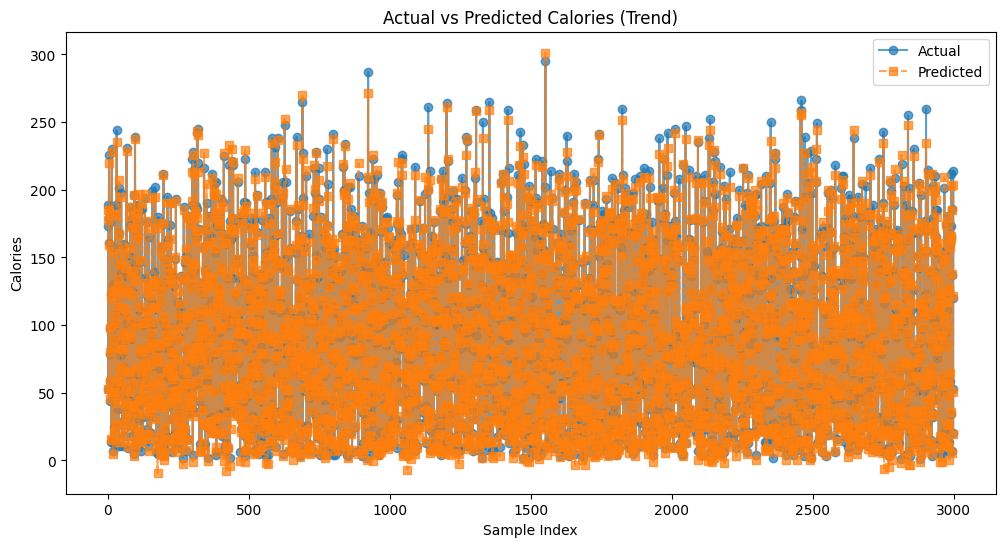

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", marker='o', linestyle="-", alpha=0.7)
plt.plot(y_pred_lr, label="Predicted", marker='s', linestyle="--", alpha=0.7)
plt.xlabel("Sample Index")
plt.ylabel("Calories")
plt.title("Actual vs Predicted Calories (Trend)")
plt.legend()
plt.show()

Linear Regression Metrics:
MAE: 2.71
RMSE: 3.64
R²: 1.00


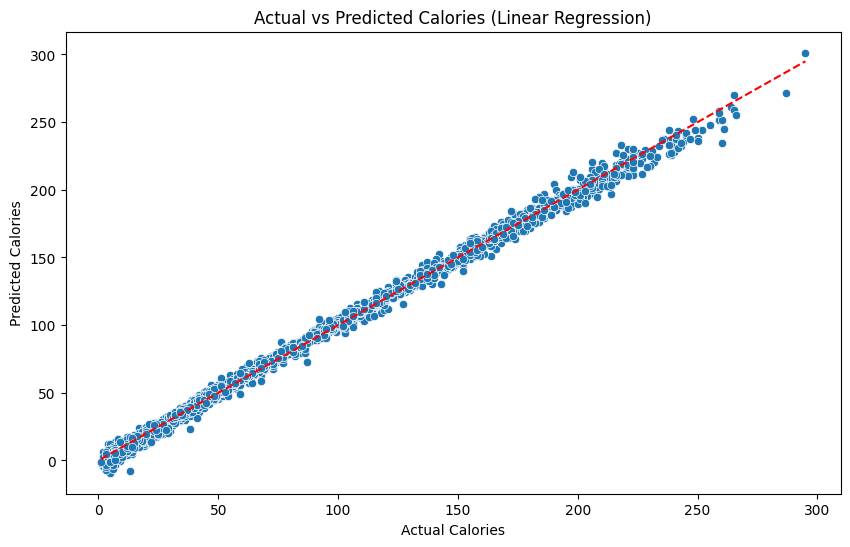

In [34]:
# Linear Regression Model - Base Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create and train the Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = model_lr.predict(X_test)

# Calculate evaluation metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Metrics:")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²: {r2_lr:.2f}")

# Visualization: Actual vs Predicted Calories
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted Calories (Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 1:1 line
plt.show()


In [35]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest model
model_rf = RandomForestRegressor(random_state=42, n_estimators=100)
model_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate the Random Forest model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # if not imported yet
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Metrics:")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²: {r2_rf:.2f}")


Random Forest Metrics:
MAE: 0.19
RMSE: 0.62
R²: 1.00


In [36]:
# XGBoost Model
import xgboost as xgb

# Create and train the XGBoost model
model_xgb = xgb.XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
model_xgb.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate the XGBoost model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # if not imported already
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Metrics:")
print(f"MAE: {mae_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"R²: {r2_xgb:.2f}")


XGBoost Metrics:
MAE: 0.49
RMSE: 0.87
R²: 1.00


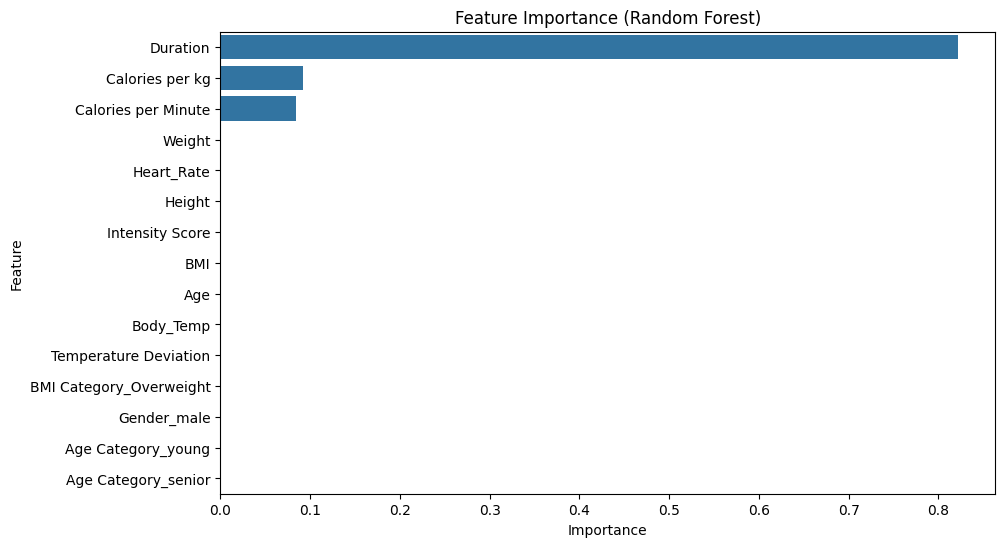

In [37]:
# Feature Importance for Random Forest
import pandas as pd

# Get feature importances from the Random Forest model
importances = model_rf.feature_importances_

# Retrieve names of features from preprocessor (for categorical, we use OneHotEncoder's output)
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = numerical_features + list(cat_feature_names)

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df.sort_values('Importance', ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


<Figure size 1000x600 with 0 Axes>

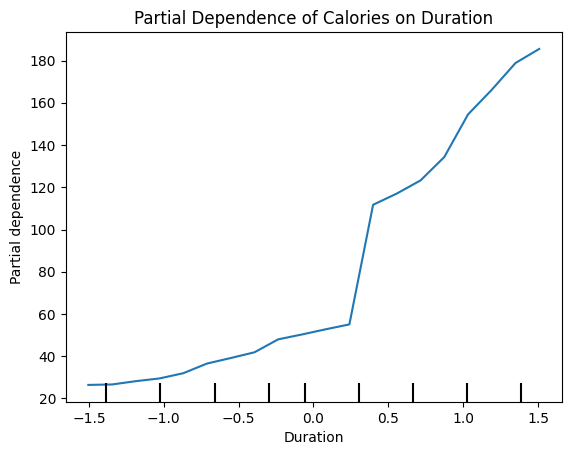

In [39]:
from sklearn.inspection import PartialDependenceDisplay

# Upewnij się, że mamy listę nazw cech, która odpowiada przekształconym danym
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = numerical_features + list(cat_feature_names)

# Znajdź indeks kolumny 'Duration'
duration_index = feature_names.index('Duration')

# Plot Partial Dependence dla cechy 'Duration'
plt.figure(figsize=(10,6))
PartialDependenceDisplay.from_estimator(
    model_rf, 
    X_train, 
    features=[duration_index], 
    feature_names=feature_names,
    grid_resolution=20
)
plt.title("Partial Dependence of Calories on Duration")
plt.show()
